In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!rm -r stock

!unzip "/content/drive/My Drive/stock.zip" 

rm: cannot remove 'stock': No such file or directory
Archive:  /content/drive/My Drive/stock.zip
   creating: stock/
  inflating: stock/225.csv           
  inflating: stock/153.csv           
  inflating: stock/70.csv            
  inflating: stock/233.csv           
  inflating: stock/17.csv            
  inflating: stock/283.csv           
  inflating: stock/162.csv           
  inflating: stock/136.csv           
  inflating: stock/202.csv           
  inflating: stock/203.csv           
  inflating: stock/127.csv           
  inflating: stock/0.csv             
  inflating: stock/224.csv           
  inflating: stock/111.csv           
  inflating: stock/226.csv           
  inflating: stock/6.csv             
  inflating: stock/145.csv           
  inflating: stock/155.csv           
  inflating: stock/128.csv           
  inflating: stock/87.csv            
  inflating: stock/99.csv            
  inflating: stock/192.csv           
  inflating: stock/193.csv           
  inflati

In [1]:

import time
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import LSTM,GRU,concatenate,Flatten
from tensorflow.keras.layers import BatchNormalization
import numpy as np
import pandas as pd
import random
import keras
import os
import keras.backend as K
import sklearn.preprocessing as prep
from keras import regularizers
import tensorflow.keras.backend as K

In [8]:

def standard_scaler(X_train):
    if len(X_train.shape)==3:
      train_samples, train_nx, train_ny = X_train.shape
      X_train = X_train.reshape((train_samples, train_nx * train_ny))
      size=int(len(X_train)//100000)
      for i in range(0,size*100000,100000):
        preprocessor = prep.MinMaxScaler(feature_range=(0, 1)).fit(X_train[i:i+100000])
        X_train[i:i+100000] = preprocessor.transform(X_train[i:i+100000])
      preprocessor = prep.MinMaxScaler(feature_range=(0, 1)).fit(X_train[size*100000:])
      X_train[size*100000:] = preprocessor.transform(X_train[size*100000:])
      X_train = X_train.reshape((train_samples, train_nx, train_ny))
      return X_train,preprocessor
    else:
      preprocessor = prep.StandardScaler().fit(X_train)
      X_train = preprocessor.transform(X_train)
      return X_train,preprocessor
def rev_standard_scaler(X_train,preprocessor):
    if len(X_train.shape)==3:
      train_samples, train_nx, train_ny = X_train.shape
      X_train = X_train.reshape((train_samples, train_nx * train_ny))
      preprocessor = prep.StandardScaler().fit(X_train)
      
      X_train =preprocessor.inverse_transform(X_train)
      X_train = X_train.reshape((train_samples, train_nx, train_ny))
      return X_train,preprocessor
    else:
      # preprocessor = prep.StandardScaler().fit(X_train)
      X_train =preprocessor.inverse_transform(X_train)
      return X_train,preprocessor
def preprocess_data():

    
    X=[]
    Y=[]
    for j in range(1):
      sequence_length = window + days
      train=[]
      listt=os.listdir("stock")
      for i in range(len(listt)):
        tmp_result=[]
        tmp_indics=[]
        stock = pd.read_csv('stock/'+listt[i])
        stock=stock.drop(['<TICKER>','<DTYYYYMMDD>','<PER>'],axis=1)
        stock=stock[::-1]
        amount_of_features = len(stock.columns)
        
        data = stock.values
        for index in range(14,len(data) - sequence_length):
            train.append(data[index : index + sequence_length])

      train=np.array(train)
      train,_=standard_scaler(train)

      X_train = train[:, : -days]
      y_train = train[:,-1][:,-1]
  
      X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], amount_of_features))
      print(X_train.shape,y_train.shape)
      X.append(X_train)
      Y=y_train
    return X[0],Y


In [18]:

def build_model(x_train):

  for i in range(1):
      model = Sequential()
      model.add(LSTM(input_shape=(window,9),units=100,return_sequences=True,activation="selu"))
      model.add(LSTM(100,return_sequences=False,activation="selu"))
      model.add(Dense(1))




  def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true))) 

  model.compile(loss=root_mean_squared_error, optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam"))
  return model

In [9]:

window=14
days=1

X_train, y_train = preprocess_data()

print("X_train", X_train.shape)
print("y_train", len(y_train))





(692189, 14, 9) (692189,)
X_train (692189, 14, 9)
y_train 692189


In [19]:

model = build_model(X_train)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 14, 100)           44000     
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 124,501
Trainable params: 124,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf

from tensorflow.keras.callbacks import ReduceLROnPlateau
# tf.keras.backend.clear_session()
ch = tf.keras.callbacks.ModelCheckpoint(
    "w.h5",
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    mode="min",

)
lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,verbose=1,
                              patience=1, min_lr=0.0000001)
model.fit(
        X_train,
        y_train,
        epochs=100,validation_split=0.2,
        batch_size=1024,callbacks=[ch],verbose=1)


In [ ]:

model.load_weights("w.h5")

In [ ]:
    
    def get_test():
      X=[]
      Y=[]
      for j in range(1):
        sequence_length = window+days
        train=[]
        listt=os.listdir("stock")
        for i in range(1):
          tmp_result=[]
          tmp_indics=[]
          stock = pd.read_csv('baf.csv')
          stock=stock.drop(['<TICKER>','<DTYYYYMMDD>','<PER>'],axis=1)
          stock=stock[::-1]
          amount_of_features = len(stock.columns)
          data = stock.values
          for index in range(len(data)-sequence_length):
              train.append(data[index : index + sequence_length])
        tmp=np.append(data[-14 :],np.ones((1,9)),axis=0)
      
        # train=np.append(train,[tmp],axis=0)
        train=np.array(train)
        train,_=standard_scaler(train)
        Xx_train = train[:, : -days]
        yy_train = train[:,-1][:,-1]
        # X_train,_ = standard_scaler(X_train)
        # y_train,preprocessor = standard_scaler(y_train.reshape((len(y_train),1)))
        Xx_train = np.reshape(Xx_train, (Xx_train.shape[0], Xx_train.shape[1], amount_of_features))
        X.append(Xx_train)
        Y=yy_train
        return X,Y,_
    X_test,y_test,preprocessor=get_test()

In [ ]:
pred=model.predict(X_test)
y=y_test
model.evaluate(X_test,y_test)


79/79 [==============================] - 0s 3ms/step - loss: 0.0077


0.007687891833484173

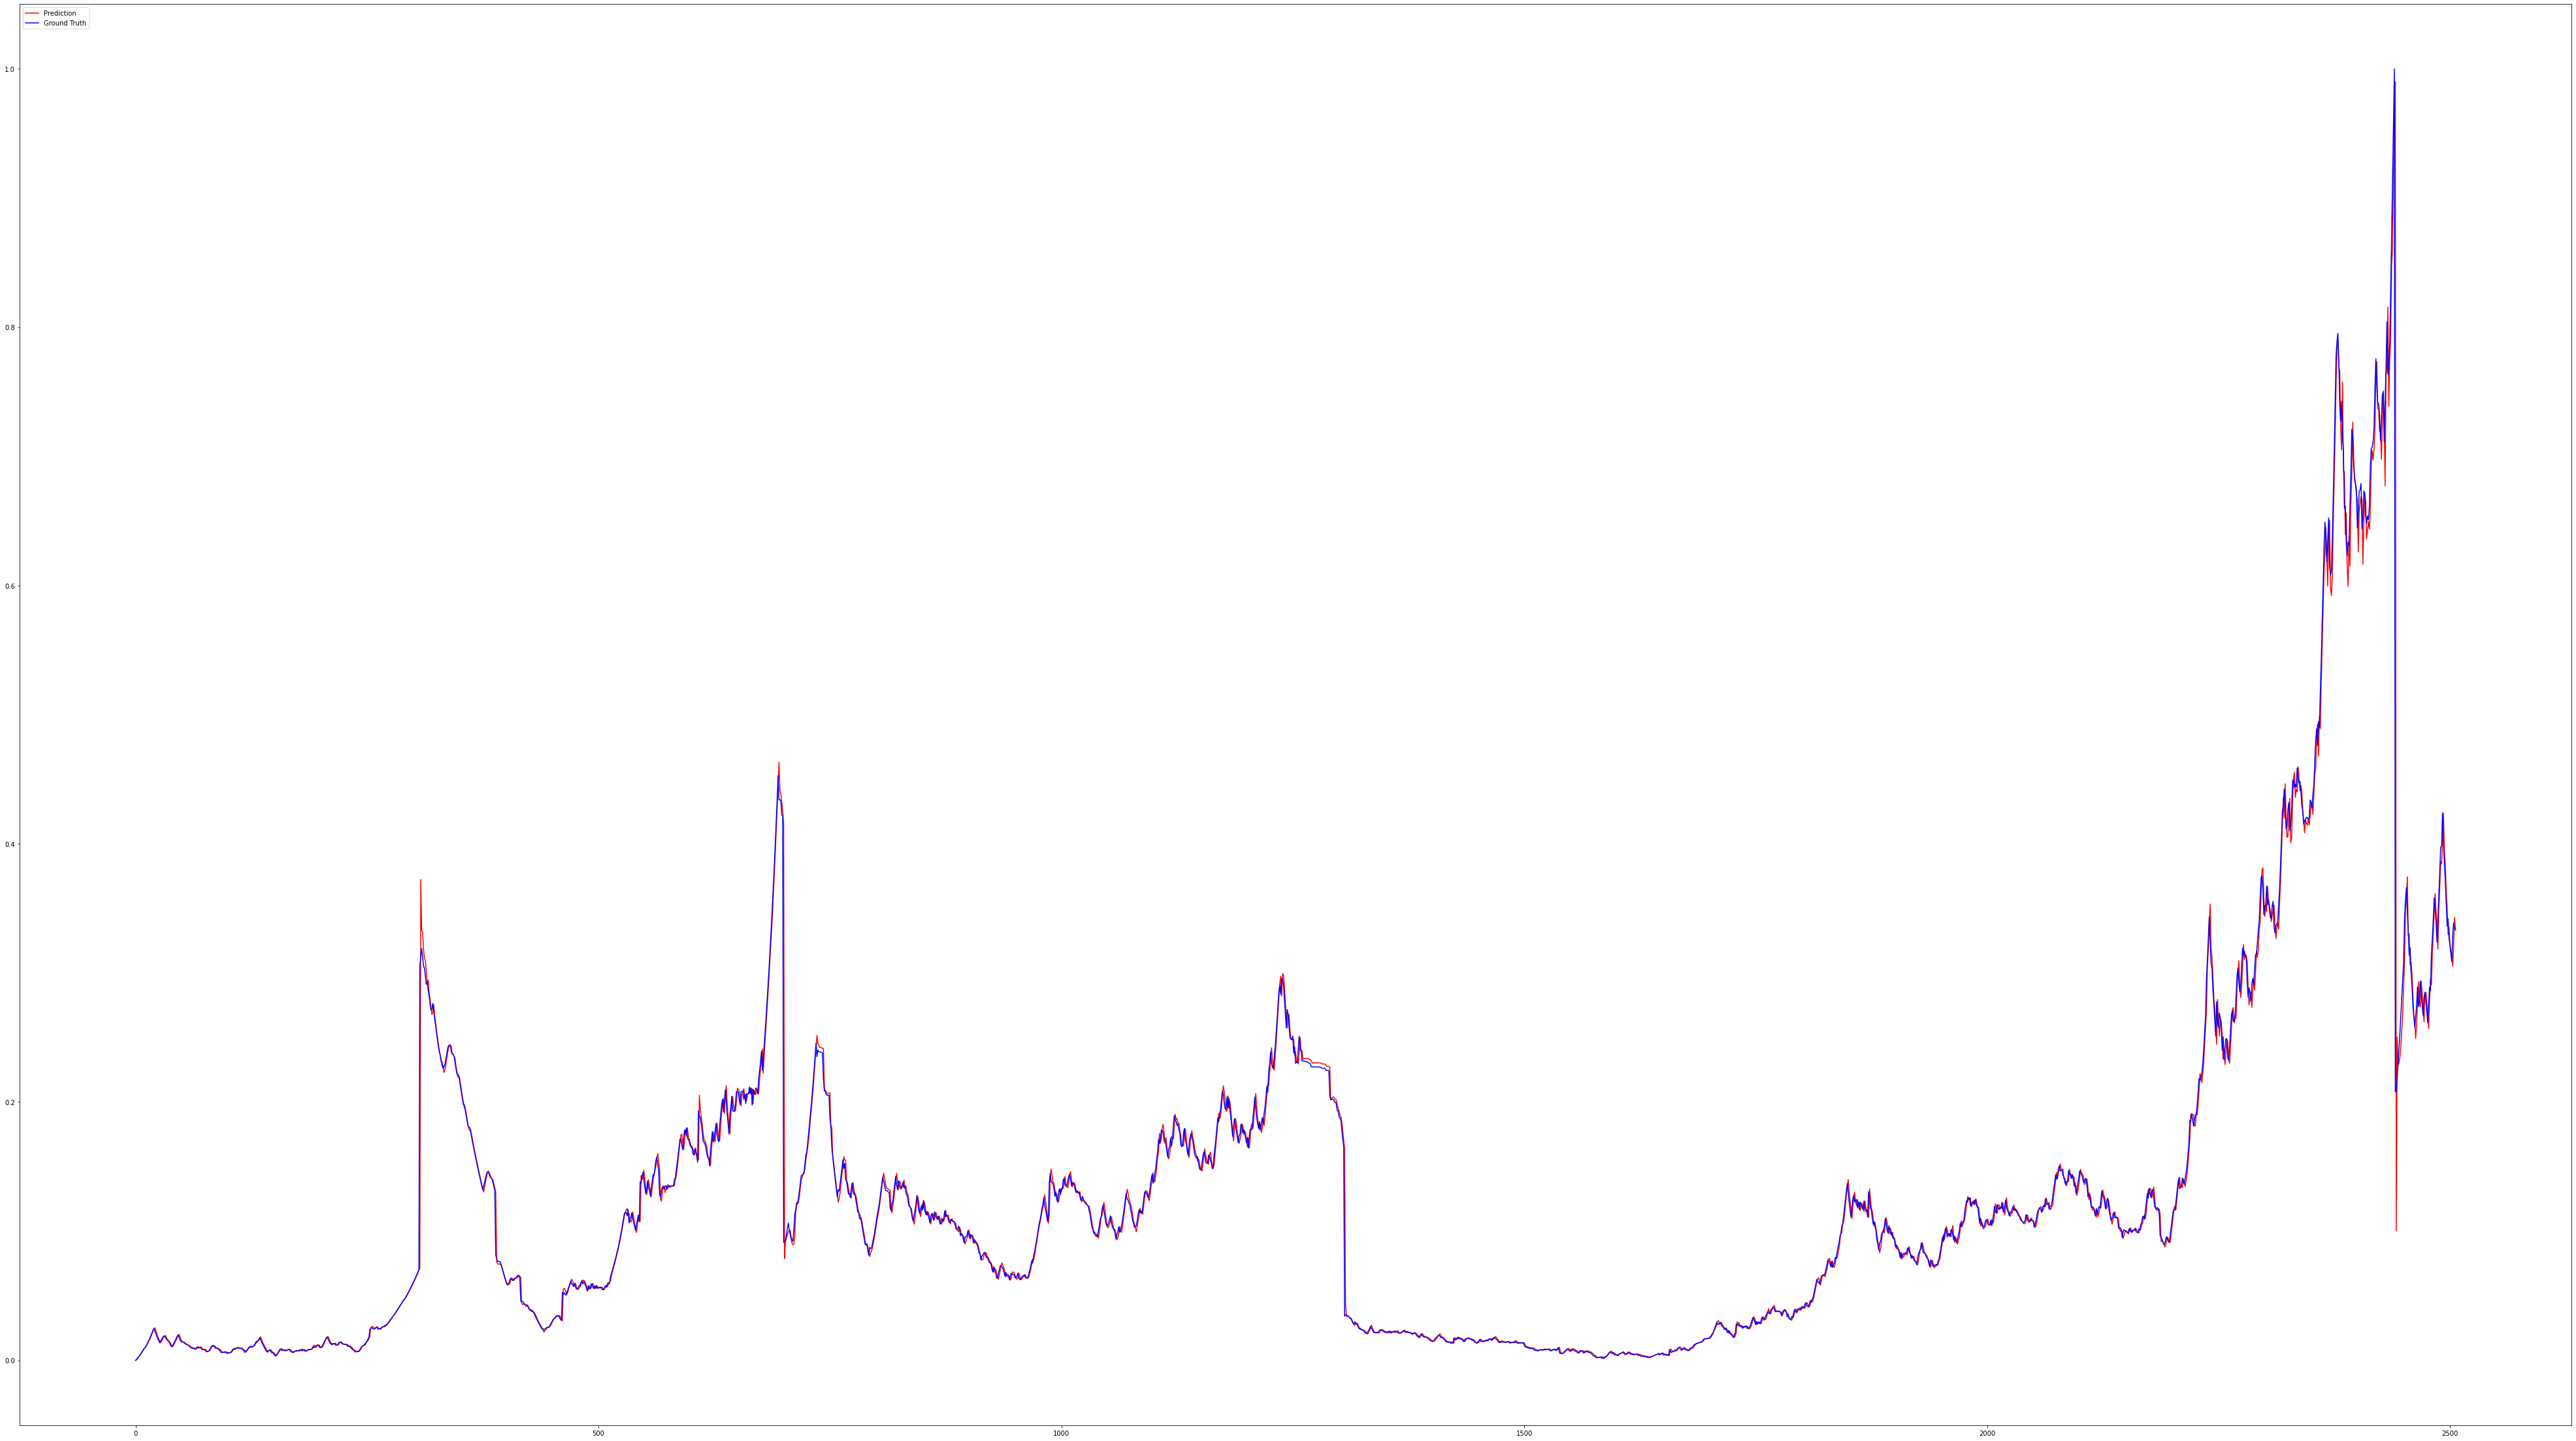

In [ ]:

import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(70,40))
plt.plot(pred, color='red', label='Prediction')
plt.plot(y, color='blue', label='Ground Truth')
plt.legend(loc='upper left')
plt.show()